In [1]:
import pandas as pd

## Methods for hyperparameter tuning
- grid search (brute force approach): it considers all the combinations of hyperparameters and returns the best set

- randomized grid search: it randomly selects a combination of hyperparameters and returns the best set

- halving grid search

## Grid Search

In [4]:
# load pima dataset
diabetes = pd.read_csv('../Data/pima.csv')
diabetes.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# feature matrix x, target vector y
X = diabetes.drop('label', axis=1)
y = diabetes['label']

In [6]:
# split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
# knn model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [8]:
# import the grid search module
from sklearn.model_selection import GridSearchCV

In [36]:
# define a grid dictionary of hyperparameter values
param_dict = {'n_neighbors': list(range(1,25))}

In [37]:
# the grid search
grid = GridSearchCV(knn, param_dict, cv=10, scoring='accuracy', n_jobs=-1, verbose=1)
# scoring: evaluation metric, accuracy, recall, precision, f1, roc_auc, etc.
# cv: number of folds in cross-validation
# n_jobs: number of cores to use, -1 means all cores
# verbose: print progress (levels 0-3)

In [38]:
# fit the grid search
grid.fit(X_train, y_train)

Fitting 10 folds for each of 49 candidates, totalling 490 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy', verbose=1)

<AxesSubplot:>

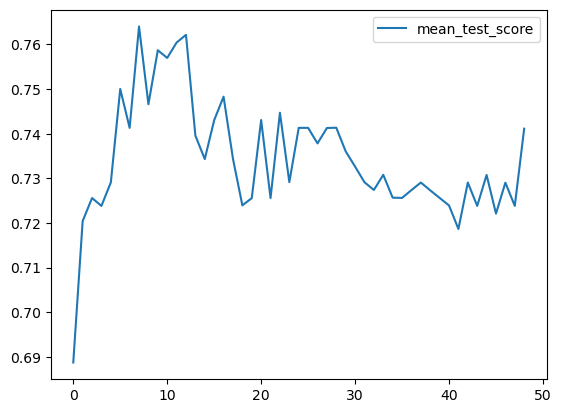

In [39]:
# grid search results
grid_results = pd.DataFrame(grid.cv_results_)
grid_results[['mean_test_score', 'params']].plot()

In [42]:
# best hyperparameter values
grid.best_params_

{'n_neighbors': 8}

In [43]:
# best score
grid.best_score_

0.7640350877192982

In [44]:
# best classifier
knn_best = grid.best_estimator_

In [45]:
# test the best classifier
y_pred = knn_best.predict(X_test)

# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7083333333333334

#### Searching over multiple hyperparameters simultaneously

- KNN has a `weights` hyperparameter

    - can be `uniform` (uniform weights) or `distance` (weight points by the inverse of their distance)
    - uniform weights is the default, it just takes the average of the neighbors
    - distance weights takes the weighted average of the neighbors, where closer neighbors of a query point will have a greater influence than neighbors which are further away

In [46]:
# parameter grid
param_grid = {'n_neighbors': list(range(1,25)),
              'weights': ['uniform', 'distance']}

In [51]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

# best hyperparameter values
print(grid.best_params_)

# best score
print(grid.best_score_)

# best classifier
knn_best = grid.best_estimator_

Fitting 10 folds for each of 48 candidates, totalling 480 fits
{'n_neighbors': 13, 'weights': 'distance'}
0.7655474894131882


In [50]:
# test the best classifier
y_pred = knn_best.predict(X_test)

# accuracy
accuracy_score(y_test, y_pred)

0.71875

## Randomized Grid Search

In [52]:
# import the random search module
from sklearn.model_selection import RandomizedSearchCV

In [65]:
randomized_grid = RandomizedSearchCV(knn, param_grid, cv=10, scoring='accuracy', n_jobs=-1, n_iter=20, verbose=1)
# fit the random search
randomized_grid.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24],
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy', verbose=1)

<AxesSubplot:>

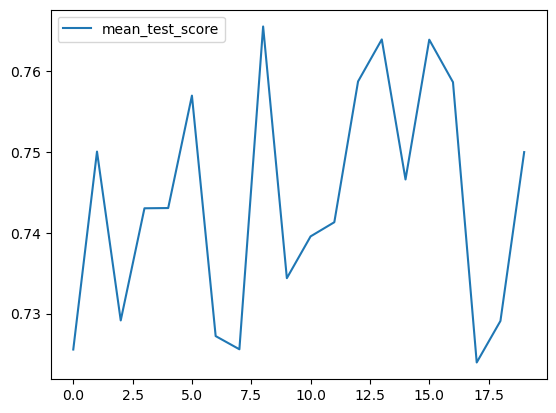

In [66]:
randomized_grid_results = pd.DataFrame(randomized_grid.cv_results_)
randomized_grid_results[['mean_test_score', 'params']].plot()

In [68]:
# best hyperparameter values
print(randomized_grid.best_params_)

# best score
print(randomized_grid.best_score_)

# best classifier
knn_best = randomized_grid.best_estimator_

{'weights': 'distance', 'n_neighbors': 13}
0.7655474894131882


## Successive Halving

- Takes a small random subset of the dataset and tests the full set of hyperparameters on that subset
- Eliminates the worst half of the hyperparameter combinations
- Repeats the process with a larger subset of the data
- Continues until only one hyperparameter combination remains